In [1]:
# Import local
from numpy.core.fromnumeric import argmax

# Import external libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [2]:
# Get data to data frame
df = pd.read_csv("Banking Prediction Sample 1 - Dataset.csv", index_col = 'Customer_ID')

# Get first 5 row
print(f"First 5 rows:\n {df.head()}")

First 5 rows:
             Gender  Age  Tenure  Saving_Amount  Current_Amount  \
Customer_ID                                                      
1                M   52      49       0.000000        0.000000   
2                F   59      49       0.000000        0.000000   
3                M   52      49      18.825714        0.000000   
4                M   54      49       0.000000      603.791429   
5                F   61      49       0.000000        0.000000   

             Time_Deposits_Amount  Funds_Amount  Stocks_Amount  \
Customer_ID                                                      
1                             0.0           0.0            0.0   
2                             0.0           0.0            0.0   
3                             0.0           0.0            0.0   
4                             0.0           0.0            0.0   
5                             0.0           0.0            0.0   

             Bank_Assurance_Amount  Life_Assurance_Amount  

In [3]:
# Describe data
described_data = df.describe().transpose()
print(f"Described data:\n {described_data}")

Described data:
                           count         mean           std   min   25%    50%  \
Age                    104733.0    45.285803     15.540300  18.0  33.0  43.00   
Tenure                 104733.0    53.938453     30.054760   0.0  33.0  55.00   
Saving_Amount          104733.0  1609.799590   7694.181205   0.0   0.0  21.19   
Current_Amount         104733.0   323.738039   2337.215922   0.0   0.0   0.00   
Time_Deposits_Amount   104733.0  1548.830453  21784.476797   0.0   0.0   0.00   
Funds_Amount           104733.0   967.336721   8716.537607   0.0   0.0   0.00   
Stocks_Amount          104733.0   617.910387  15906.599559   0.0   0.0   0.00   
Bank_Assurance_Amount  104733.0     9.542685     70.467561   0.0   0.0   0.00   
Life_Assurance_Amount  104733.0     2.744323     34.522766   0.0   0.0   0.00   
Business_Loan_Amount   104733.0   391.255315   5032.130272   0.0   0.0   0.00   
Home_Loan_Amount       104733.0  1271.831169   9310.062040   0.0   0.0   0.00   
Consumer_Lo

In [4]:
# Print info
info = df.info()
print(f"Data frame informaton: {info}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104733 entries, 1 to 104733
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Gender                 104733 non-null  object 
 1   Age                    104733 non-null  int64  
 2   Tenure                 104733 non-null  int64  
 3   Saving_Amount          104733 non-null  float64
 4   Current_Amount         104733 non-null  float64
 5   Time_Deposits_Amount   104733 non-null  float64
 6   Funds_Amount           104733 non-null  float64
 7   Stocks_Amount          104733 non-null  float64
 8   Bank_Assurance_Amount  104733 non-null  float64
 9   Life_Assurance_Amount  104733 non-null  float64
 10  Business_Loan_Amount   104733 non-null  float64
 11  Home_Loan_Amount       104733 non-null  float64
 12  Consumer_Loan_Amount   104733 non-null  float64
 13  Branch_Transactions    104733 non-null  int64  
 14  ATM_Transactions       104733 non-nu

In [5]:
from data_preparation import (modifyData, changeToDummies, 
                        columns_to_boolean, printUniqueValues)

In [6]:
# Unique values
printUniqueValues(df)

Unique values
The number of values for feature Gender: 2 -- ['F' 'M']
The number of values for feature Age: 73
The number of values for feature Tenure: 174
The number of values for feature Saving_Amount: 58918
The number of values for feature Current_Amount: 22366
The number of values for feature Time_Deposits_Amount: 3444
The number of values for feature Funds_Amount: 5064
The number of values for feature Stocks_Amount: 7173
The number of values for feature Bank_Assurance_Amount: 3667
The number of values for feature Life_Assurance_Amount: 814
The number of values for feature Business_Loan_Amount: 2462
The number of values for feature Home_Loan_Amount: 4072
The number of values for feature Consumer_Loan_Amount: 23907
The number of values for feature Branch_Transactions: 144
The number of values for feature ATM_Transactions: 95
The number of values for feature Phone_Transactions: 21
The number of values for feature Internet_Transactions: 16
The number of values for feature Standing_Ord

In [7]:
# Check if there are any null values
null_values = df.isnull().sum()
print(f"Number of null values per column:\n {null_values}")

Number of null values per column:
 Gender                   0
Age                      0
Tenure                   0
Saving_Amount            0
Current_Amount           0
Time_Deposits_Amount     0
Funds_Amount             0
Stocks_Amount            0
Bank_Assurance_Amount    0
Life_Assurance_Amount    0
Business_Loan_Amount     0
Home_Loan_Amount         0
Consumer_Loan_Amount     0
Branch_Transactions      0
ATM_Transactions         0
Phone_Transactions       0
Internet_Transactions    0
Standing_Orders          0
New_Credit_Card_Flag     0
dtype: int64


In [8]:
# Check values

df['New_Credit_Card_Flag'].value_counts()

0    98933
1     5800
Name: New_Credit_Card_Flag, dtype: int64

In [9]:
# Get new data frame with modified data
# For more info see data_manipulation.py
df_new = modifyData(df)

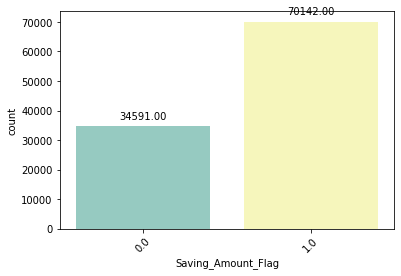

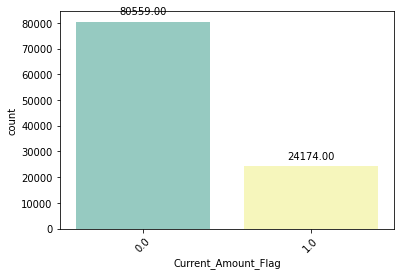

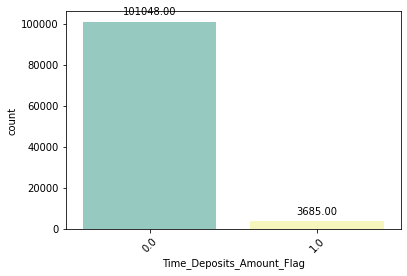

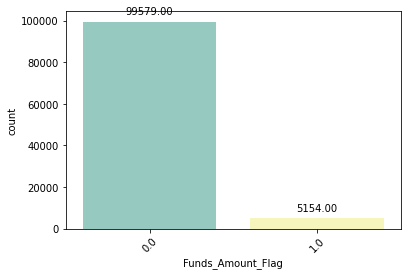

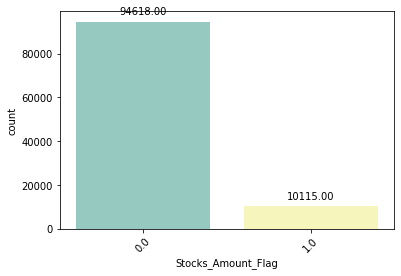

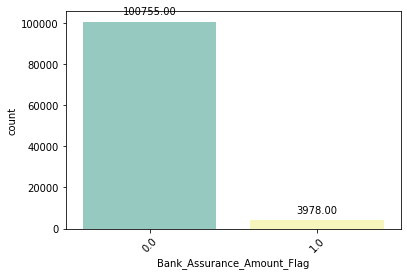

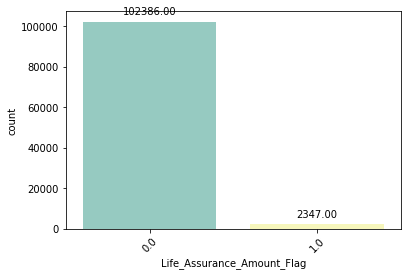

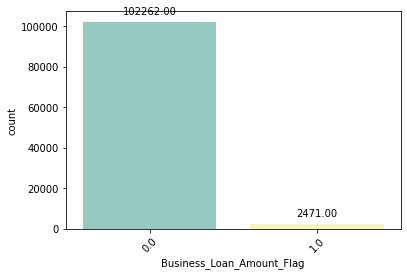

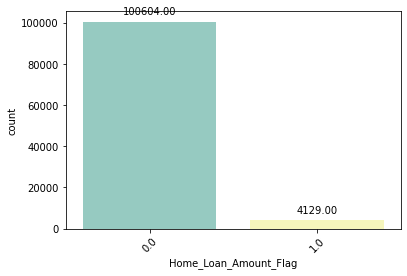

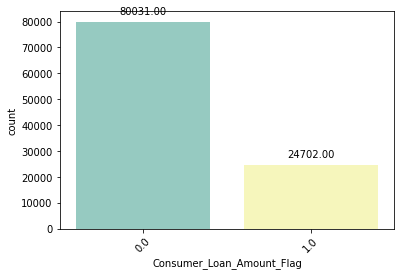

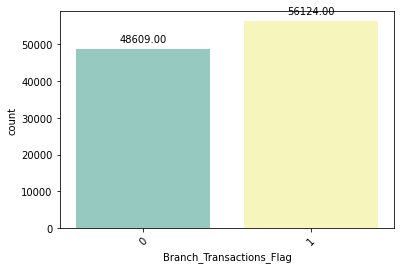

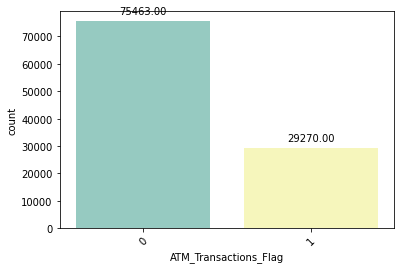

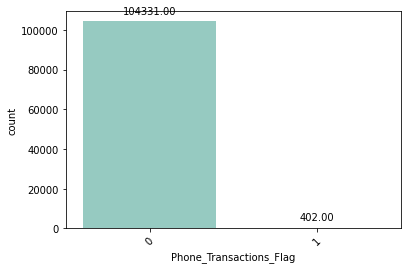

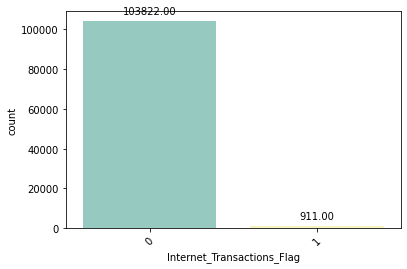

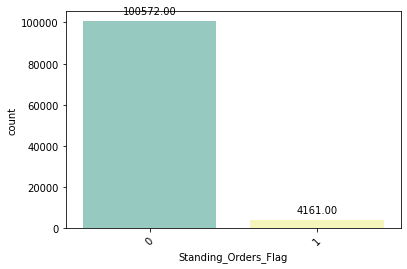

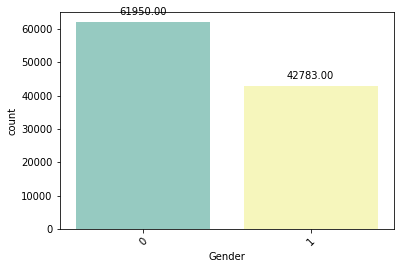

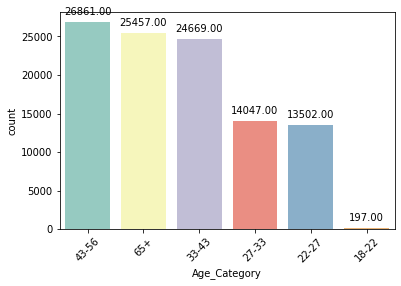

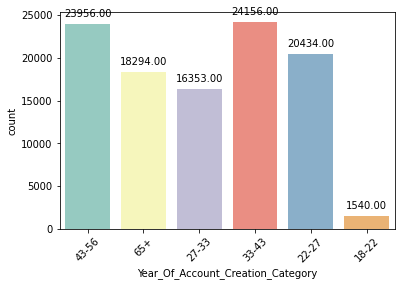

In [10]:
features = [f"{column}_Flag" for column in columns_to_boolean]
features.extend(["Gender", "Age_Category", "Year_Of_Account_Creation_Category"])

for feature in features:
    splot = sns.countplot(x=feature, data=df_new, palette="Set3")
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

    plt.xticks(rotation=45)
    plt.show()

In [11]:
df_new = changeToDummies(df_new)

# Get correlation matrix
correlation_matrix = df_new.corrwith(df['New_Credit_Card_Flag'])
print(f"Correlation matrix:\n {correlation_matrix}")

# Create new data frame without New_Credit_Card_Flag column
df_x = df_new.drop(["New_Credit_Card_Flag"], axis=1)

# Create new data frame with only New_Credit_Card_Flag column
df_y = df_new["New_Credit_Card_Flag"]

Correlation matrix:
 Gender                                    -0.011998
Age                                       -0.043864
Tenure                                     0.028626
Saving_Amount_Flag                        -0.112052
Current_Amount_Flag                       -0.015033
Time_Deposits_Amount_Flag                 -0.028791
Funds_Amount_Flag                         -0.024785
Stocks_Amount_Flag                        -0.028005
Bank_Assurance_Amount_Flag                 0.015441
Life_Assurance_Amount_Flag                 0.051058
Business_Loan_Amount_Flag                  0.019847
Home_Loan_Amount_Flag                      0.005007
Consumer_Loan_Amount_Flag                  0.126362
Branch_Transactions_Flag                   0.116849
ATM_Transactions_Flag                      0.143364
Phone_Transactions_Flag                    0.073411
Internet_Transactions_Flag                 0.272236
Standing_Orders_Flag                       0.022349
New_Credit_Card_Flag                       

In [12]:
# Split data into random train and test subsets (Cross validation)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=.2)


In [13]:

from neural_network import build_neural_network

neural_network_model = build_neural_network(x_train, y_train)

Epoch 1/20
2619/2619 [==============================] - 3s 871us/step - loss: 0.2276 - accuracy: 0.9440
Epoch 2/20
2619/2619 [==============================] - 2s 905us/step - loss: 0.2151 - accuracy: 0.9444
Epoch 3/20
2619/2619 [==============================] - 2s 821us/step - loss: 0.2119 - accuracy: 0.9444
Epoch 4/20
2619/2619 [==============================] - 2s 811us/step - loss: 0.2087 - accuracy: 0.9444
Epoch 5/20
2619/2619 [==============================] - 2s 874us/step - loss: 0.2066 - accuracy: 0.9444
Epoch 6/20
2619/2619 [==============================] - 2s 868us/step - loss: 0.2046 - accuracy: 0.9444
Epoch 7/20
2619/2619 [==============================] - 2s 823us/step - loss: 0.2031 - accuracy: 0.9444
Epoch 8/20
2619/2619 [==============================] - 2s 777us/step - loss: 0.2007 - accuracy: 0.9444
Epoch 9/20
2619/2619 [==============================] - 2s 835us/step - loss: 0.2001 - accuracy: 0.9444
Epoch 10/20
2619/2619 [==============================] - 2s 883u

In [14]:
# Predict using trained model and test data
y_hat = neural_network_model.predict(x_test)

# Modify predicted values to either 0 or 1 depending if < 0.5 or not
y_hat = [0 if val < 0.5 else 1 for val in y_hat]

# Calculate accuracy
neural_network_accuracy = accuracy_score(y_test, y_hat)
print(f"Accuracy score of neural network is {neural_network_accuracy}")

Accuracy score of neural network is 0.9455769322576025


In [15]:
from random_forest import build_random_forest, parse_first_tree


Accuracy score random forest is 0.9562705876736526
|--- feature_25 <= 0.50
|   |--- feature_12 <= 0.50
|   |   |--- feature_19 <= 0.50
|   |   |   |--- class: 1.0
|   |   |--- feature_19 >  0.50
|   |   |   |--- feature_17 <= 0.50
|   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |--- feature_13 <= 0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_13 >  0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |--- feature_15 <= 0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_15 >  0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_17 >  0.50
|   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |--- feature_29 <= 0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_29 >  0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |--- feature_2 <= 96.00
|   |   |   |   |   |   |--- 

C:\Users\aheldes\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


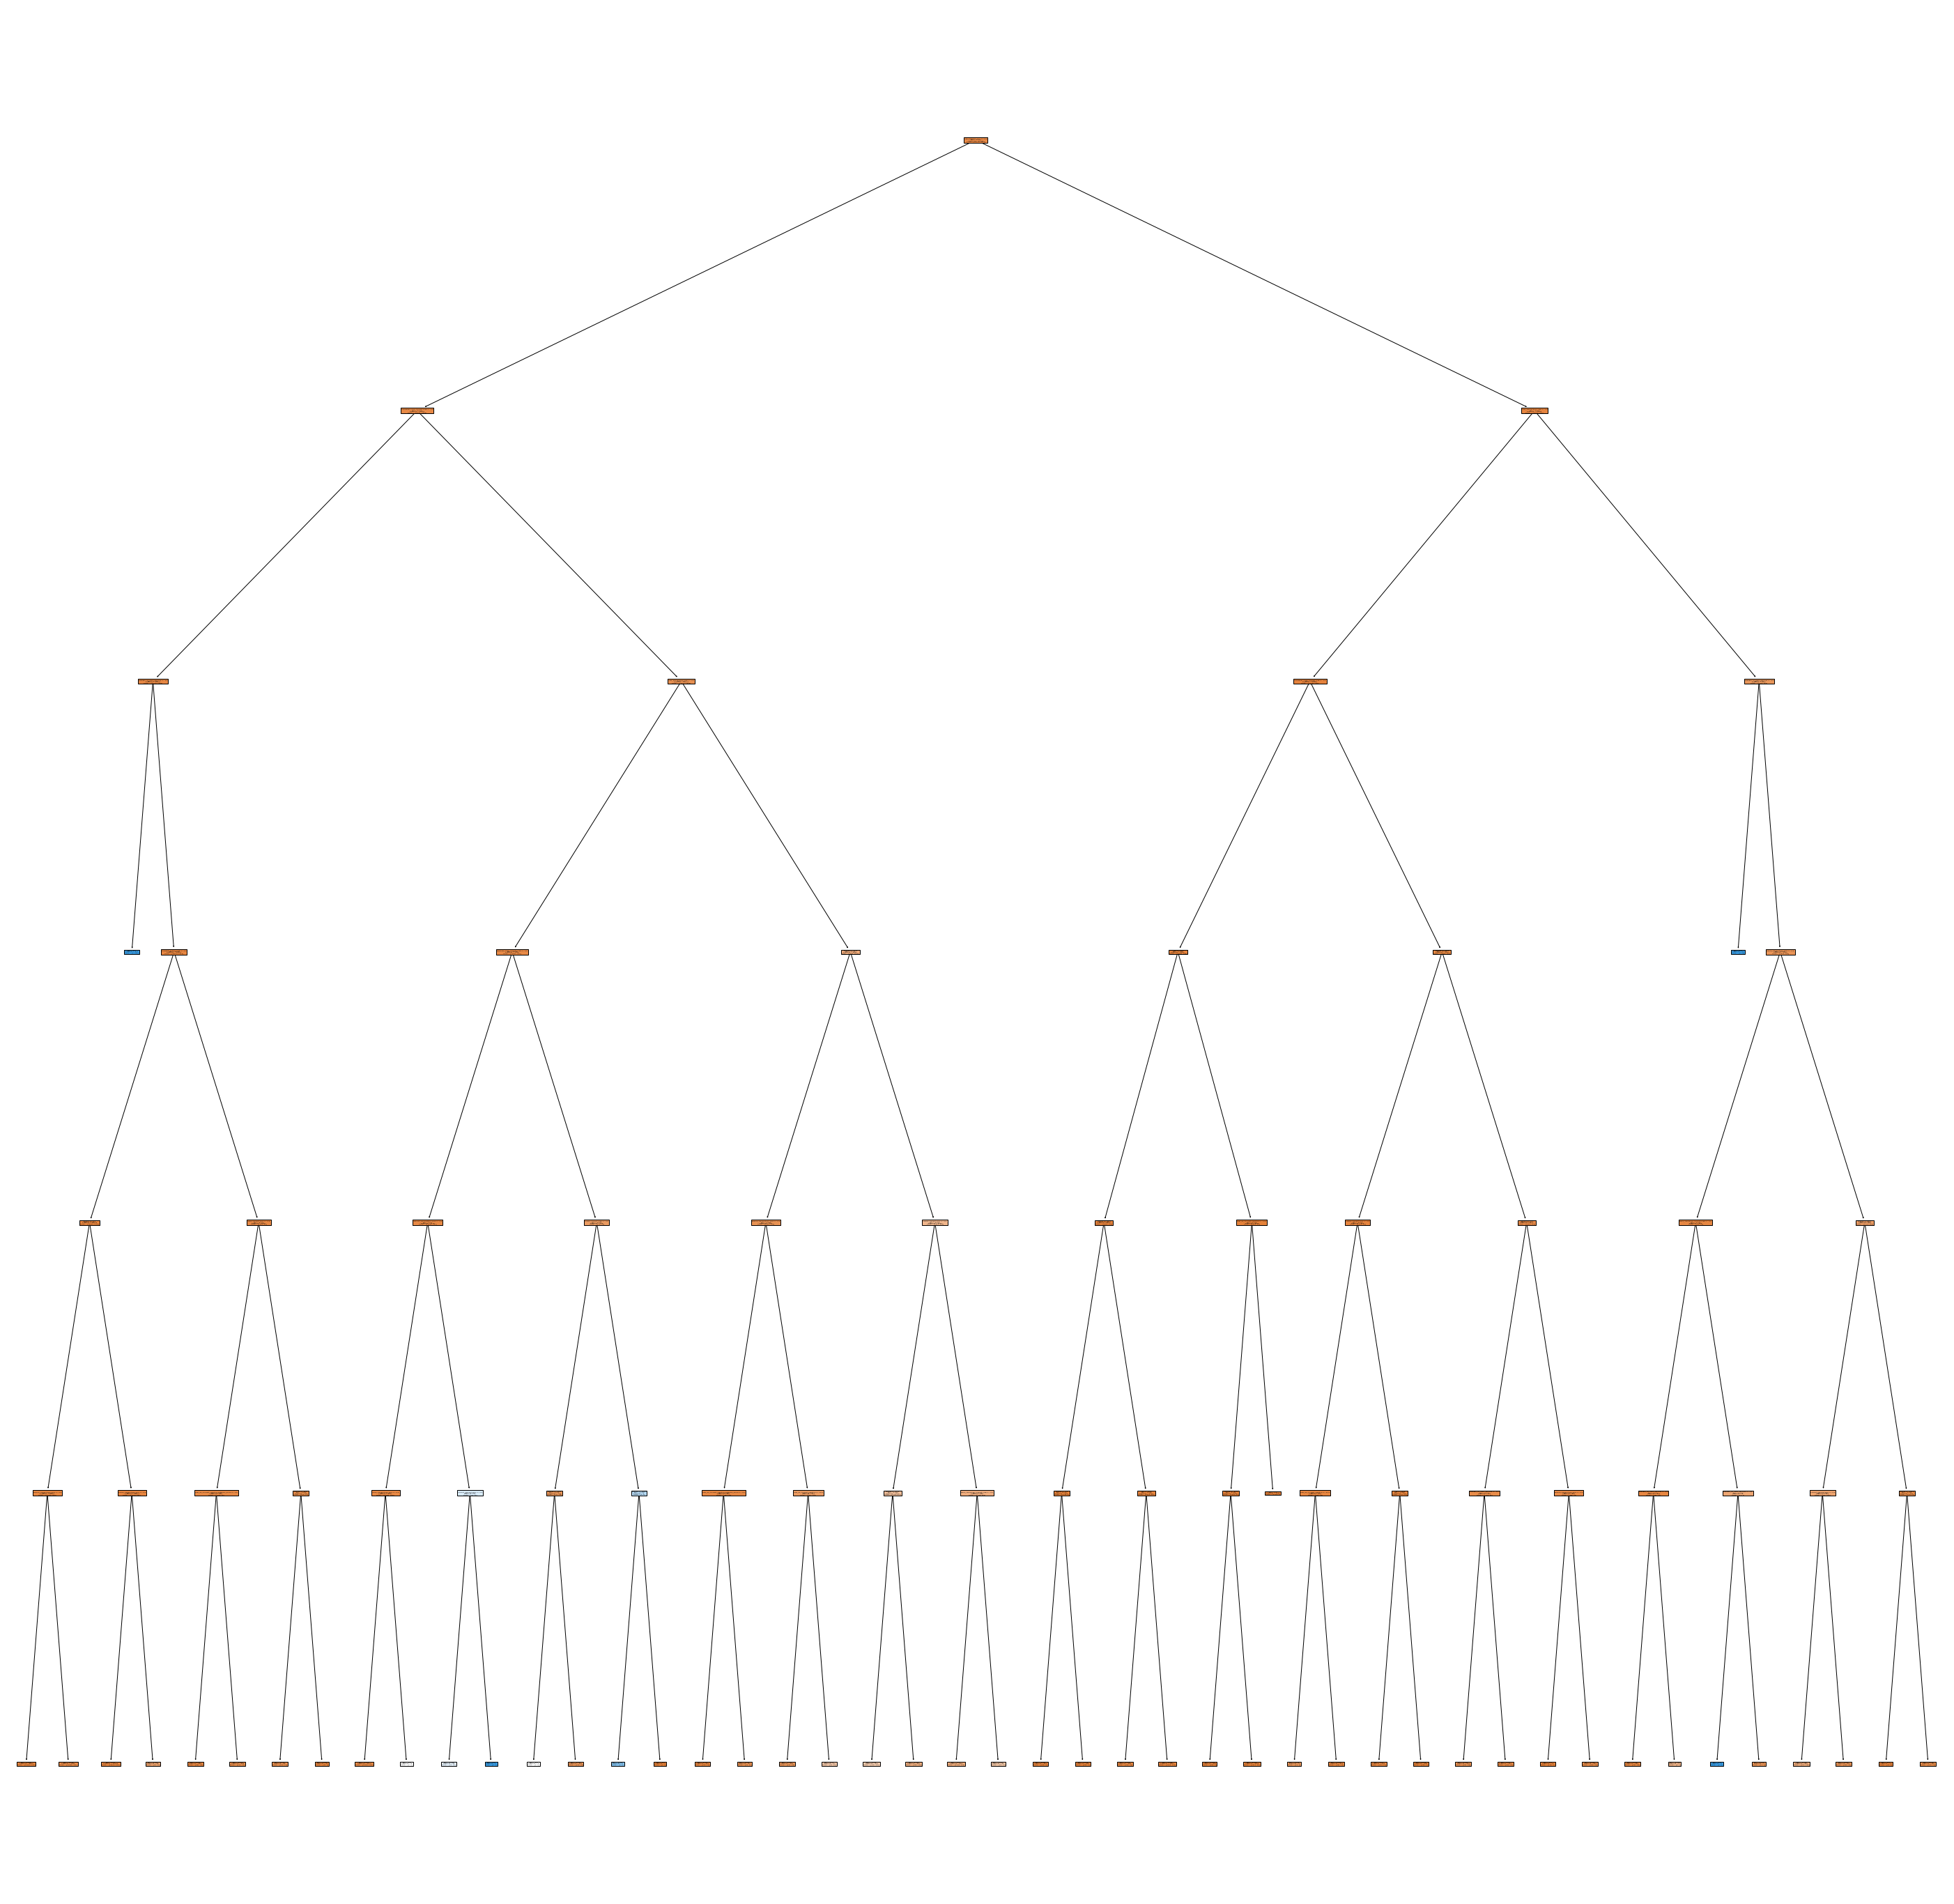

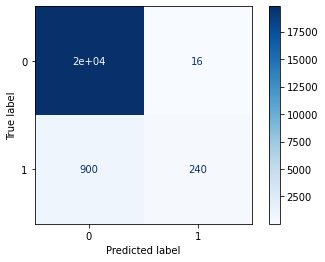

In [16]:
random_forest_model = build_random_forest(x_train, y_train)

y_hat = random_forest_model.predict(x_test)

random_forest_acurracy = accuracy_score(y_test, y_hat)
print(f"Accuracy score random forest is {random_forest_acurracy}")

parse_first_tree(random_forest_model, x_train.columns)


disp = plot_confusion_matrix(random_forest_model, x_test, y_test,                                            
                                 cmap=plt.cm.Blues)

plt.show()

In [17]:
from kmeans_alg import cluster_optimization, kmeans_build

kmeans_data = df_new.values

In [18]:
kmeans_build(kmeans_data)

The clusters are: [1 1 1 ... 0 0 1]
The inertia is: 58603660.01431063
   Cluster 0  Cluster 1  Cluster 2
0      42877      31479      30377


(array([1, 1, 1, ..., 0, 0, 1]), array([1, 1, 1, ..., 0, 0, 1]))

Initializing check for optimal number of clusters
The inertia for : 2 Clusters is: 82108413.76428704
Difference in inertia between clusters: 23504658.964974865
The inertia for : 3 Clusters is: 58603754.799312174
Difference in inertia between clusters: 18700856.1286951
The inertia for : 4 Clusters is: 39902898.670617074
Difference in inertia between clusters: 7281047.081348117
The inertia for : 5 Clusters is: 32621851.589268956
Difference in inertia between clusters: 4330296.135040179
The inertia for : 6 Clusters is: 28291555.454228777
Difference in inertia between clusters: 4024483.5804515034
The inertia for : 7 Clusters is: 24267071.873777274
Difference in inertia between clusters: 2875813.5755101293
The inertia for : 8 Clusters is: 21391258.298267145
Difference in inertia between clusters: 2221012.74815372
The inertia for : 9 Clusters is: 19170245.550113425


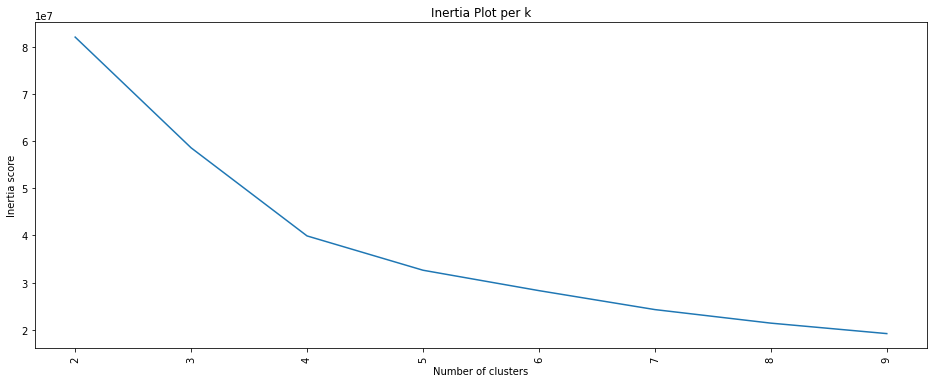

{3: 23504658.964974865, 4: 18700856.1286951, 5: 7281047.081348117, 6: 4330296.135040179, 7: 4024483.5804515034, 8: 2875813.5755101293, 9: 2221012.74815372}


In [19]:
cluster_optimization(kmeans_data)

In [20]:
from kmeans_alg import components_optimization

Number of components: 33
Total Variance in our dataset is:  1375.2549589823996
The 95% variance we want to have is:  1306.4922110332795

Variance explain with 1 n_compononets:  942.2245092466275
Variance explain with 2 n_compononets:  1371.7722770132561
Variance explain with 3 n_compononets:  1372.471288080967
Variance explain with 4 n_compononets:  1372.8532221024648
Variance explain with 5 n_compononets:  1373.1963089767946
Variance explain with 10 n_compononets:  1374.384461025218
Variance explain with 15 n_compononets:  1374.8925427643062
Variance explain with 20 n_compononets:  1375.1142599324633
Variance explain with 25 n_compononets:  1375.2230714335121
Variance explain with 30 n_compononets:  1375.2549589823996
Variance explain with 32 n_compononets:  1375.2549589823996


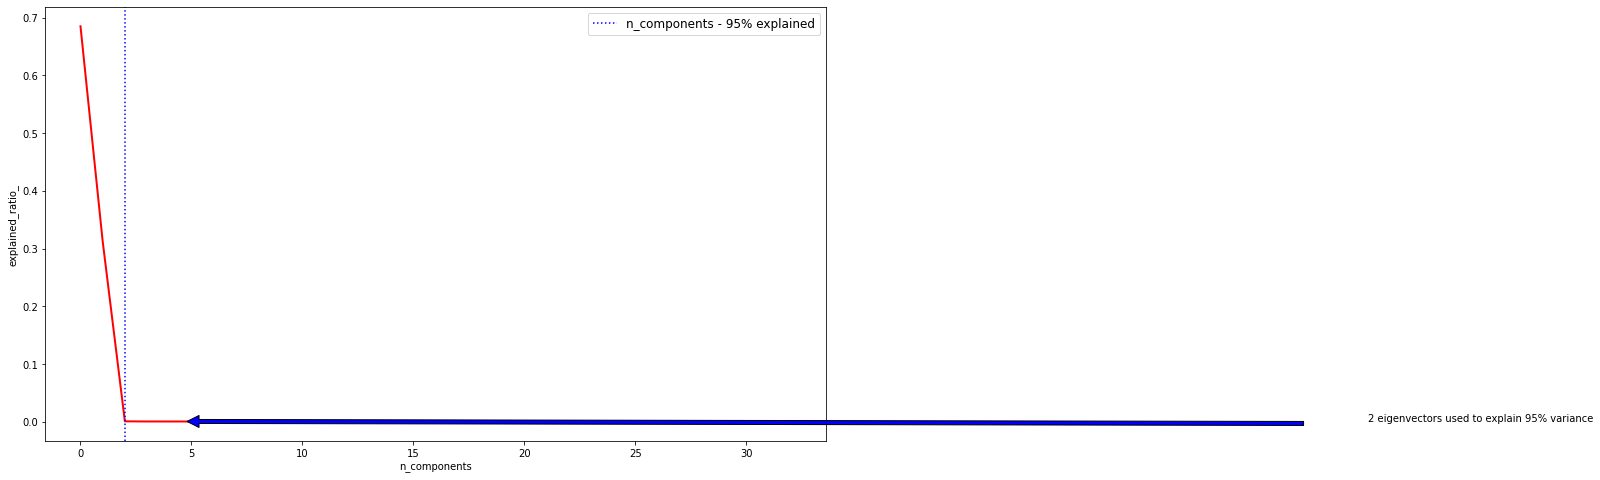

In [21]:
components_optimization(kmeans_data)

Initializing check for optimal number of clusters
The inertia for : 2 Clusters is: 81745650.26097888
Difference in inertia between clusters: 23503369.044119656
The inertia for : 3 Clusters is: 58242281.21685922
Difference in inertia between clusters: 18700188.73996011
The inertia for : 4 Clusters is: 39542092.47689911
Difference in inertia between clusters: 7277395.486824557
The inertia for : 5 Clusters is: 32264696.990074553
Difference in inertia between clusters: 4327413.130289573
The inertia for : 6 Clusters is: 27937283.85978498
Difference in inertia between clusters: 4010447.110200744
The inertia for : 7 Clusters is: 23926836.749584235
Difference in inertia between clusters: 2876954.8060515076
The inertia for : 8 Clusters is: 21049881.943532728
Difference in inertia between clusters: 2214636.14247036
The inertia for : 9 Clusters is: 18835245.801062368


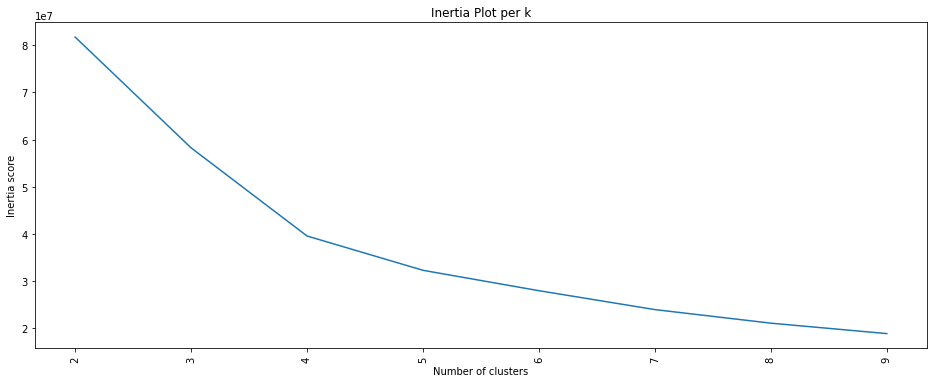

{3: 23503369.044119656, 4: 18700188.73996011, 5: 7277395.486824557, 6: 4327413.130289573, 7: 4010447.110200744, 8: 2876954.8060515076, 9: 2214636.14247036}


In [22]:
cluster_optimization(kmeans_data, 2)

In [23]:
kmeans_build(kmeans_data, 2, 3)

The clusters are: [2 2 2 ... 0 0 0]
The inertia is: 58242281.21685922
   Cluster 0  Cluster 1  Cluster 2
0      42652      30513      31568


(array([2, 2, 2, ..., 0, 0, 0]), array([2, 2, 2, ..., 0, 0, 0]))

In [24]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy = 0.5)

x_res, y_res = ros.fit_resample(df_x, df_y)

y_res.value_counts()

0    98933
1    49466
Name: New_Credit_Card_Flag, dtype: int64

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=101)

In [26]:
neural_network_model = build_neural_network(x_train, y_train)

# Predict using trained model and test data
y_hat = neural_network_model.predict(x_test)

# Modify predicted values to either 0 or 1 depending if < 0.5 or not
y_hat = [0 if val < 0.5 else 1 for val in y_hat]

# Calculate accuracy
neural_network_accuracy = accuracy_score(y_test, y_hat)
print(f"Accuracy score of neural network is {neural_network_accuracy}")

Epoch 1/20
3710/3710 [==============================] - 3s 746us/step - loss: 0.6252 - accuracy: 0.6675
Epoch 2/20
3710/3710 [==============================] - 3s 774us/step - loss: 0.5984 - accuracy: 0.6798
Epoch 3/20
3710/3710 [==============================] - 3s 741us/step - loss: 0.5833 - accuracy: 0.6908
Epoch 4/20
3710/3710 [==============================] - 3s 744us/step - loss: 0.5701 - accuracy: 0.7029
Epoch 5/20
3710/3710 [==============================] - 3s 734us/step - loss: 0.5591 - accuracy: 0.7124
Epoch 6/20
3710/3710 [==============================] - 3s 883us/step - loss: 0.5473 - accuracy: 0.7193
Epoch 7/20
3710/3710 [==============================] - 3s 843us/step - loss: 0.5413 - accuracy: 0.7254
Epoch 8/20
3710/3710 [==============================] - 3s 801us/step - loss: 0.5344 - accuracy: 0.7314
Epoch 9/20
3710/3710 [==============================] - 3s 732us/step - loss: 0.5269 - accuracy: 0.7359
Epoch 10/20
3710/3710 [==============================] - 3s 766u

Accuracy score random forest is 0.8035040431266847
|--- feature_19 <= 0.50
|   |--- class: 1.0
|--- feature_19 >  0.50
|   |--- feature_16 <= 0.50
|   |   |--- feature_18 <= 57.50
|   |   |   |--- feature_5 <= 0.50
|   |   |   |   |--- feature_18 <= 20.50
|   |   |   |   |   |--- feature_13 <= 0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_13 >  0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_18 >  20.50
|   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_5 >  0.50
|   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |--- feature_14 <= 0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_14 >  0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |--- class: 0.0
|   |

C:\Users\aheldes\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


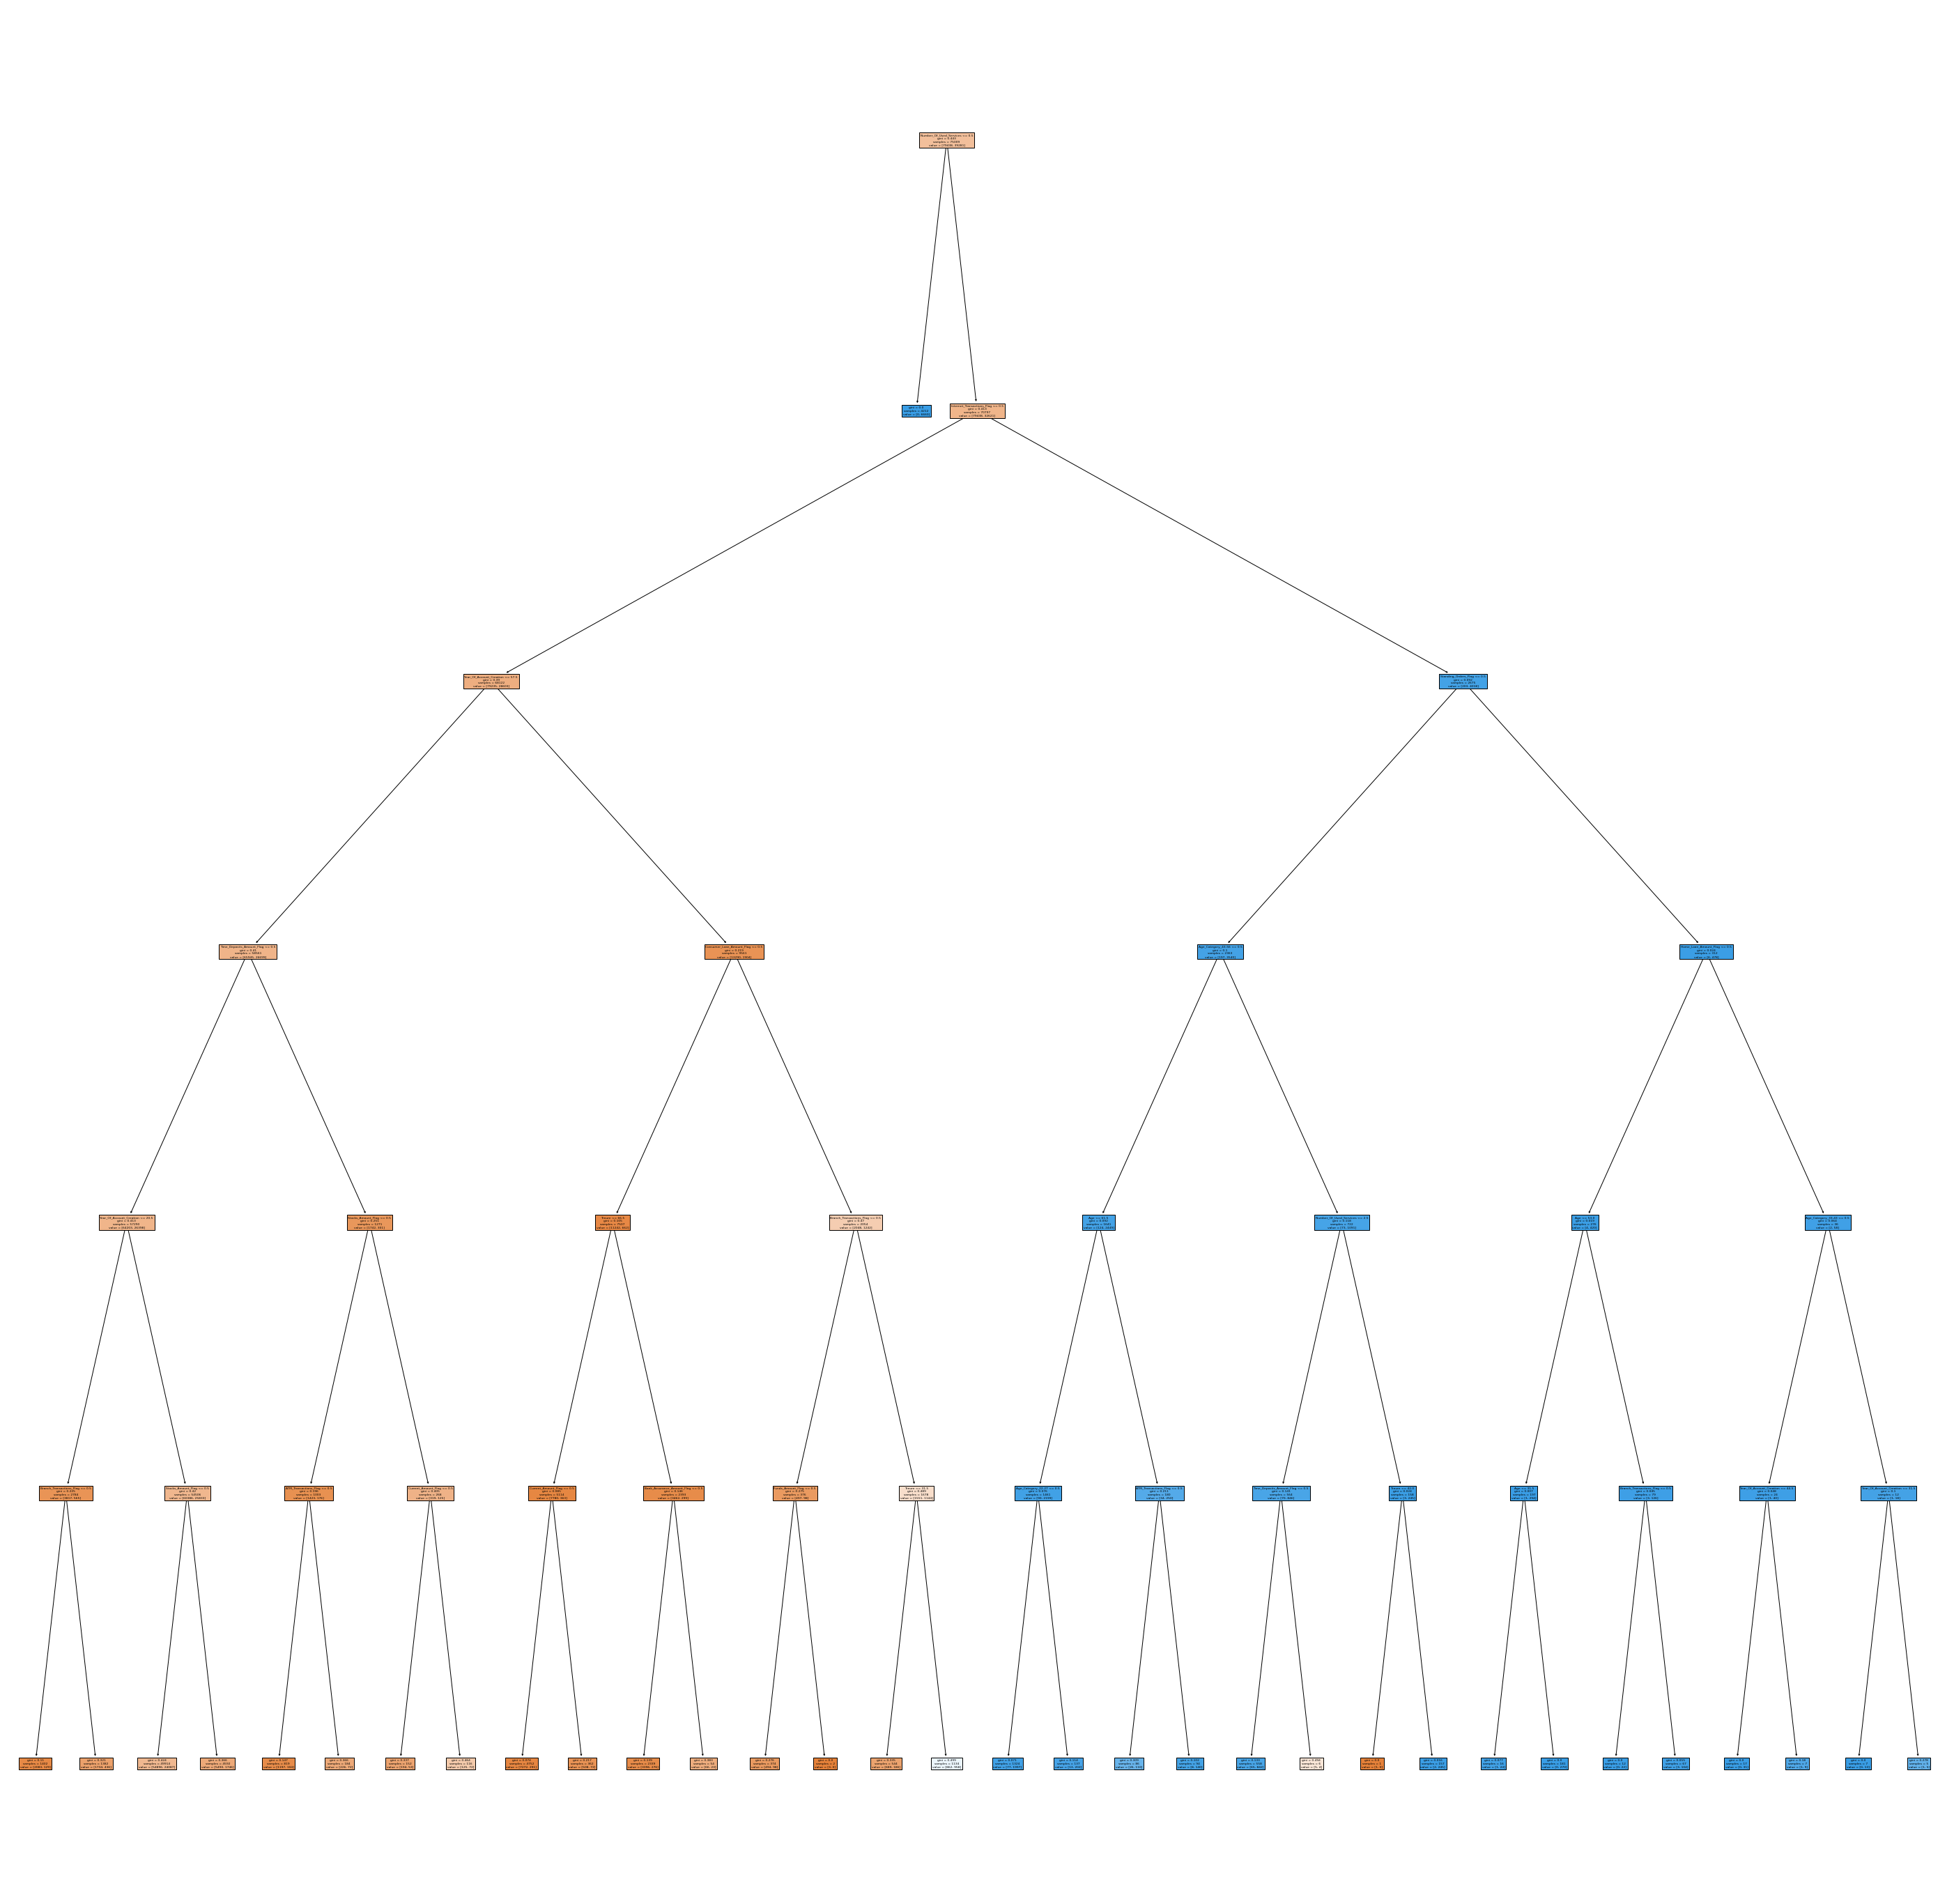

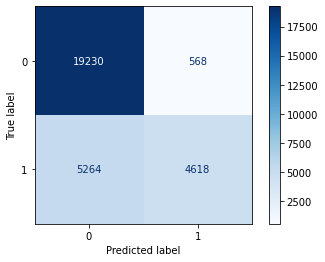

In [27]:
random_forest_model = build_random_forest(x_train, y_train)

y_hat = random_forest_model.predict(x_test)

random_forest_acurracy = accuracy_score(y_test, y_hat)
print(f"Accuracy score random forest is {random_forest_acurracy}")

parse_first_tree(random_forest_model, x_train.columns)


disp = plot_confusion_matrix(random_forest_model, x_test, y_test,                                            
                                 cmap=plt.cm.Blues)

plt.show()

In [28]:
x_res["New_Credit_Card_Flag"] = y_res
kmeans_data = x_res.values

In [29]:
kmeans_build(kmeans_data)

The clusters are: [0 0 0 ... 0 2 2]
The inertia is: 77741963.5254107
   Cluster 0  Cluster 1  Cluster 2
0      42612      46845      58942


(array([0, 0, 0, ..., 0, 2, 2]), array([0, 0, 0, ..., 0, 2, 2]))

Initializing check for optimal number of clusters
The inertia for : 2 Clusters is: 107451949.23643255
Difference in inertia between clusters: 29709670.489771143
The inertia for : 3 Clusters is: 77742278.74666141
Difference in inertia between clusters: 24836727.87884751
The inertia for : 4 Clusters is: 52905550.8678139
Difference in inertia between clusters: 8974187.778357163
The inertia for : 5 Clusters is: 43931363.08945674
Difference in inertia between clusters: 6330151.549220018
The inertia for : 6 Clusters is: 37601211.54023672
Difference in inertia between clusters: 4975327.3363081515
The inertia for : 7 Clusters is: 32625884.203928567
Difference in inertia between clusters: 4002589.2343547605
The inertia for : 8 Clusters is: 28623294.969573807
Difference in inertia between clusters: 2773923.955311466
The inertia for : 9 Clusters is: 25849371.01426234


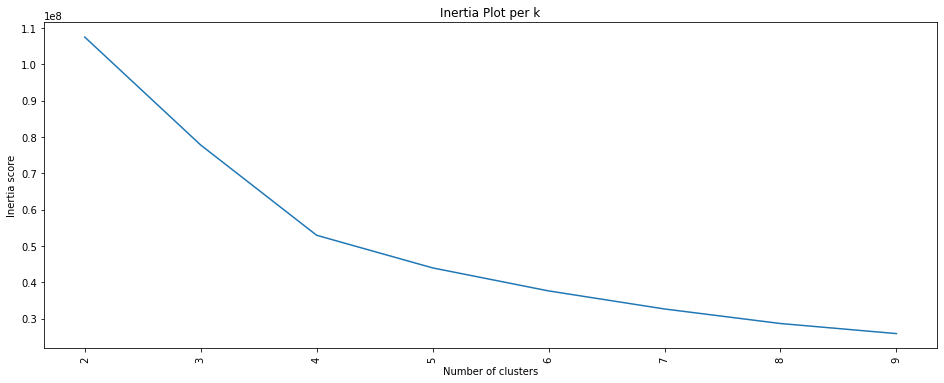

{3: 29709670.489771143, 4: 24836727.87884751, 5: 8974187.778357163, 6: 6330151.549220018, 7: 4975327.3363081515, 8: 4002589.2343547605, 9: 2773923.955311466}


In [30]:
cluster_optimization(kmeans_data)

Number of components: 33
Total Variance in our dataset is:  1256.982444358247
The 95% variance we want to have is:  1194.1333221403345

Variance explain with 1 n_compononets:  866.8919326315795
Variance explain with 2 n_compononets:  1253.051959971335
Variance explain with 3 n_compononets:  1253.9301954501827
Variance explain with 4 n_compononets:  1254.3444711881511
Variance explain with 5 n_compononets:  1254.7008261116541
Variance explain with 10 n_compononets:  1255.9600991406392
Variance explain with 15 n_compononets:  1256.5718516061693
Variance explain with 20 n_compononets:  1256.8105791888968
Variance explain with 25 n_compononets:  1256.940303638971
Variance explain with 30 n_compononets:  1256.982444358247
Variance explain with 32 n_compononets:  1256.982444358247


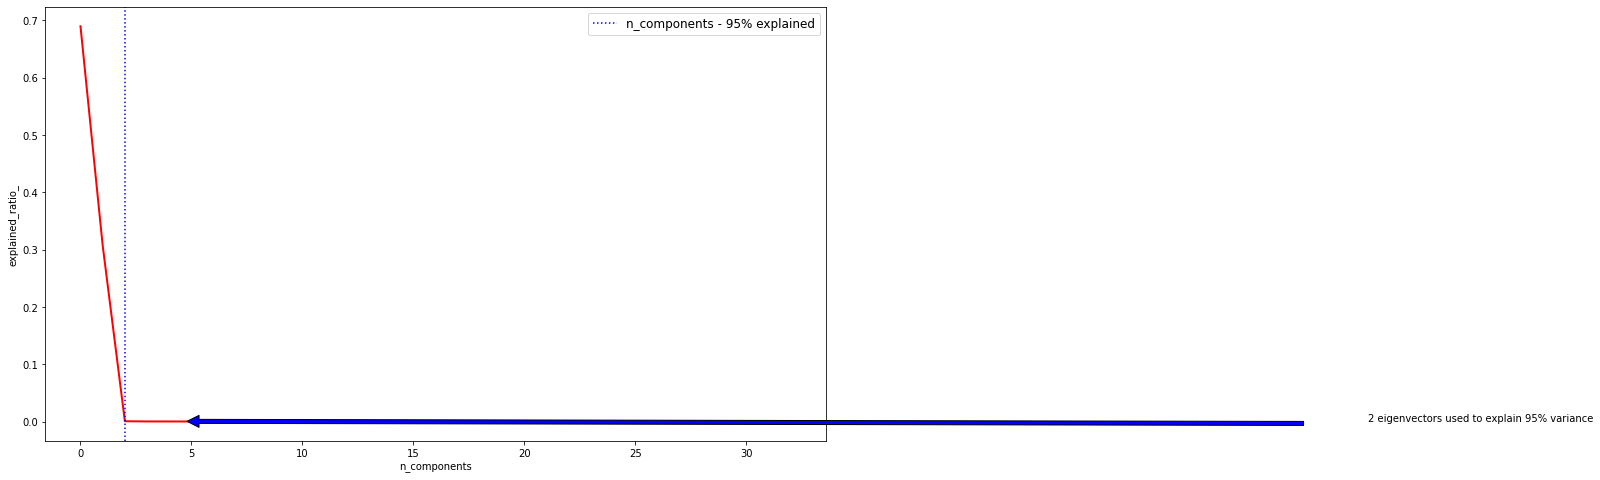

In [31]:
components_optimization(kmeans_data)

Initializing check for optimal number of clusters
The inertia for : 2 Clusters is: 106868772.60979
Difference in inertia between clusters: 29704989.86870897
The inertia for : 3 Clusters is: 77163782.74108103
Difference in inertia between clusters: 24834924.409260094
The inertia for : 4 Clusters is: 52328858.331820935
Difference in inertia between clusters: 8968871.68284516
The inertia for : 5 Clusters is: 43359986.648975775
Difference in inertia between clusters: 6330531.659903832
The inertia for : 6 Clusters is: 37029454.98907194
Difference in inertia between clusters: 4948099.3824810125
The inertia for : 7 Clusters is: 32081355.60659093
Difference in inertia between clusters: 4006666.950224325
The inertia for : 8 Clusters is: 28074688.656366605
Difference in inertia between clusters: 2777230.7921706587
The inertia for : 9 Clusters is: 25297457.864195947


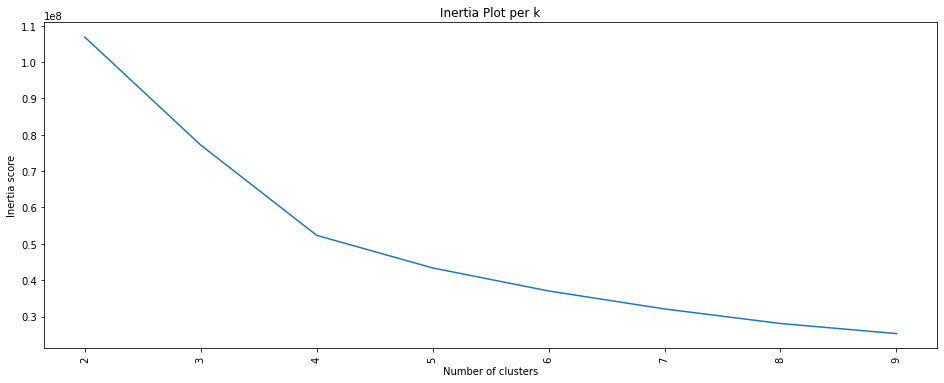

{3: 29704989.86870897, 4: 24834924.409260094, 5: 8968871.68284516, 6: 6330531.659903832, 7: 4948099.3824810125, 8: 4006666.950224325, 9: 2777230.7921706587}


In [32]:
cluster_optimization(kmeans_data, 2)

In [33]:
predictions = kmeans_build(kmeans_data, 2, 3)

The clusters are: [2 2 2 ... 2 0 0]
The inertia is: 77161547.60638477
   Cluster 0  Cluster 1  Cluster 2
0      58802      46858      42739


In [38]:
labels
for i in labels:
    plt.scatter(df[predictions == i , 0] , df[predictions == i , 1] , label = i)
plt.legend()
plt.show()

TypeError: '(array([ True,  True,  True, ...,  True, False, False]), 0)' is an invalid key

In [41]:
predictions

array([2, 2, 2, ..., 2, 0, 0])